In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline 

In [2]:
df = pd.read_csv('cardio.csv', sep = ';')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Overall check

In [4]:
df.shape

(70000, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


#### There is no null values in each column and data types seem to be coherent with feature description, however, I would like to check if there is any duplicated rows in the dataset.

In [6]:
print('There are {} duplicated rows in the dataset.'.format(df[df.duplicated()].shape[0]))
#df.drop_duplicates(keep = False, inplace = True) 

There are 0 duplicated rows in the dataset.


#### Next, I will create a new column that contains age (by years).

In [7]:
# let's first create a new columne named age_yrs
age_yrs = df.age.apply(lambda x: x/365)
df.insert(2, "age_yrs", age_yrs, True)

In [8]:
# check whether age_yrs is well inserted in the dataset
df.head()

,id,age,age_yrs,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [9]:
# check statistic metrics of each column in the dataset
df.describe().round(2)

,id,age,age_yrs,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.0,70000.0
mean,49972.42,19468.87,53.34,1.35,164.36,74.21,128.82,96.63,1.37,1.23,0.09,0.05,0.8,0.5
std,28851.30,2467.25,6.76,0.48,8.21,14.40,154.01,188.47,0.68,0.57,0.28,0.23,0.4,0.5
min,0.00,10798.00,29.58,1.00,55.00,10.00,-150.00,-70.00,1.00,1.00,0.00,0.00,0.0,0.0
25%,25006.75,17664.00,48.39,1.00,159.00,65.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0
50%,50001.50,19703.00,53.98,1.00,165.00,72.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0
75%,74889.25,21327.00,58.43,2.00,170.00,82.00,140.00,90.00,2.00,1.00,0.00,0.00,1.0,1.0
max,99999.00,23713.00,64.97,2.00,250.00,200.00,16020.00,11000.00,3.00,3.00,1.00,1.00,1.0,1.0


#### I can see that:
#### - No children and no very elderly patients are present in this dataset, since minimum of age_yrs is 29 and maximum of age_yrs is 65.
#### - Min height seems very small: 55cm - this needs to be addressed. Same for max height: 250cm.
#### - Min weight is 10kg and max weight is 200kg. This will need to be cleaned up too.
#### - ap_hi (Systolic blood pressure) contains negative values (seeing its min is -150). Its max is out of range. Same remarks for ap_lo (Diastolic blood pressure). I use the following website to know normal range of blood pressure: http://www.bloodpressureuk.org/microsites/kyn/Home/AboutKYN/BPbasics/Thenumbers
#### - cholesterol, gluc, smoke, alco, active and cardio look OK. However, I will proceed a detailed check later to ensure that there is no anomalies.

### Check binary and categorical values

#### I will proceed first a quick check of binary and categorical values colums: gender, cholesterol, gluc, smoke, alco, active, cardio to ensure that every entries are conform to pre-set values.

In [10]:
def check_categorical_features(dataframe, feature, valid_values):
    '''This function will help to check whether all entries in selected column are conform to the dataset description;
    Parameters:
    - dataframe: dataframe of which categorical columns need to be checked.
    - feature: categorical feature name, as a string. For example: gender, cholesterol, cardio...
    - valid_values: a set of valid values of that feature. For example: {0,1} is valid values set for cardio column.
    '''
    if set(dataframe[feature].unique()) == valid_values:
        print('Values in {} column are valid.'.format(feature))
    else:
        print('Values in {} column are not valid.'.format(feature))

In [11]:
# Valid values of each categorical values column are:
# - gender: 1 for women and 2 for men
# - cholesterol: 1: normal, 2: above normal, 3: well above normal
# - gluc = Glucose: 1: normal, 2: above normal, 3: well above normal
# - smoke: 0: no, 1: yes
# - alco: Alcohol intake: 0: no, 1: yes
# - active: Physical activity: 0: no, 1: yes
# - cardio: Presence or absence of cardiovascular disease: 0: no, 1: yes

# create a dictionnary having column name as key and set of valid values as value:
valid = {'gender': {1, 2}, 'cholesterol': {1, 2, 3}, 'gluc': {1, 2, 3}, 'smoke': {0, 1}, 'alco': {0, 1}, 'active': {0, 1}, 'cardio': {0, 1}}

# create a list of categorical values columns
cat_cols = df.columns[-6:]

for col in cat_cols:
    check_categorical_features(df, col, valid[col])

Values in cholesterol column are valid.
Values in gluc column are valid.
Values in smoke column are valid.
Values in alco column are valid.
Values in active column are valid.
Values in cardio column are valid.


#### Next, let's dive into numeric values colums: height, weight, ap_hi and ap_lo

### Check ap_hi (Systolic blood pressure) and ap_lo (Diastolic blood pressure)

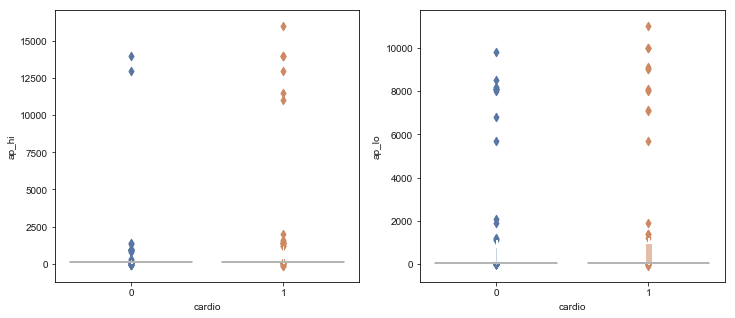

In [12]:
# visualize ap_hi and ap_lo values in boxplots
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=False)
sns.set(style="whitegrid")
sns.boxenplot(x=df["cardio"], y=df['ap_hi'], orient = 'v', ax=ax1)
sns.boxenplot(x=df["cardio"], y=df['ap_lo'], orient = 'v', ax=ax2)

#### As seen above, there are a lot of outliers such as negative values as well as some unrealistic values.
#### According to this website: http://www.bloodpressureuk.org/microsites/kyn/Home/AboutKYN/BPbasics/Thenumbers
#### ''Blood pressure usually ranges between 90 to 250 for the top or maximum number (systolic) and 60 to 140 for the bottom or minimum number (diastolic).''
#### I will first drop negative and unrealistic values: above 300 for ap_hi and above 200 for ap_lo.
#### Why these threshold? The above website mentions usual blood pressure.
#### But this dataset contains medical records of diseased people and I don't want to lose data by dropping values that are near usual range.
#### It is understandable that there are outliers: people with very high or very low blood pressures that are out of normal range.

In [13]:
# drop negative and 0 values
df.drop(df[df.ap_hi<=0].index, axis=0, inplace=True)
df.drop(df[df.ap_lo<=0].index, axis=0, inplace=True)

In [14]:
# drop unrealistic values: above 300 for ap_hi and above 200 for ap_lo.
df.drop(df[df.ap_hi>300].index, axis=0, inplace=True)
df.drop(df[df.ap_lo>200].index, axis=0, inplace=True)

#### Let's plot blood pressure distribution:

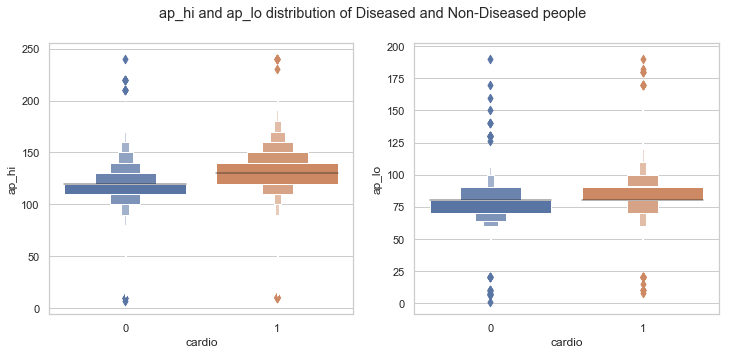

In [15]:
# visualize ap_hi and ap_lo values in boxplots
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=False)
sns.set(style="whitegrid")
sns.boxenplot(x=df["cardio"], y=df['ap_hi'], orient = 'v', ax=ax1)
sns.boxenplot(x=df["cardio"], y=df['ap_lo'], orient = 'v', ax=ax2)
figure.suptitle('ap_hi and ap_lo distribution of Diseased and Non-Diseased people');

#### There are still some outliers. Only a medical specialist could tell exactly if it is OK to remove them. For instance, I will keep them in the dataset.

#### Now I want to check if there is any row where ap_lo is higher than ap_hi, since Diastolic blood pressure (ap_lo) is usually lower than Systolic blood pressure (ap_hi).

In [16]:
df[df.ap_hi<df.ap_lo].head()

,id,age,age_yrs,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
474,681,19099,52.326027,1,156,65.0,120,150,2,1,0,0,1,0
567,815,21281,58.304110,1,168,78.0,14,90,2,1,0,0,1,1
636,913,20457,56.046575,2,169,68.0,70,110,1,1,0,0,1,0
927,1294,21867,59.909589,2,175,70.0,14,90,3,1,0,0,1,1
979,1360,18225,49.931507,1,172,65.0,11,80,1,3,0,0,1,0


In [17]:
df[df.ap_hi<df.ap_lo].shape

(274, 14)

#### When I dive into the difference between ap_hi and ap_lo, I check some pairs of values against this website: https://www.nhs.uk/conditions/low-blood-pressure-hypotension/ and find out that ap_lo might be higher than ap_hi in some cases.
#### Although in this dataset, there are some pairs of values such as (ap_hi, ap_lo) = (80, 170) that appears to be unrealistic, I still can't find a good method to address those. 
#### Moreover, a specialist advice is required in this case for a good data treatment. So for safety, I decice to let these rows leave the dataset.

In [18]:
df.drop(df[df.ap_hi<df.ap_lo].index, axis=0, inplace=True)

### Check height and weight

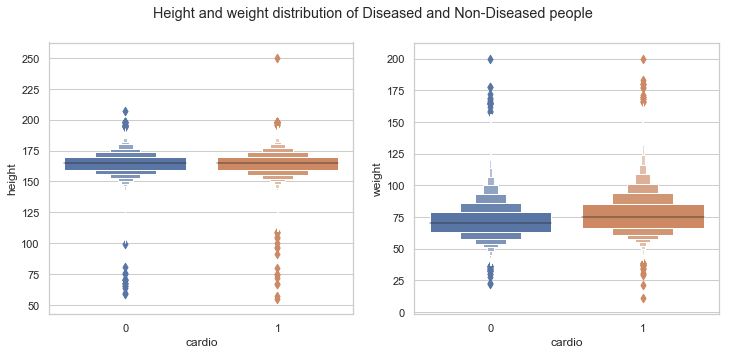

In [19]:
# visualize height and weight values in boxplots
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=False)
sns.set(style="whitegrid")
sns.boxenplot(x=df["cardio"], y=df['height'], orient = 'v', ax=ax1)
sns.boxenplot(x=df["cardio"], y=df['weight'], orient = 'v', ax=ax2)
figure.suptitle('Height and weight distribution of Diseased and Non-Diseased people');

#### There are a lot of outliers here, especially there are some values that are unrealistic for human's height (above 200cm and under 100cm). Same for weight (under 25 kg). Note that this datasets contains adults's medical records only (from 29 to 65 years old). I will drop those values.

In [20]:
df.drop(df[(df.height<100) | (df.height>200)].index, axis=0, inplace=True)
df.drop(df[df.weight<25].index, axis=0, inplace=True)

### Calculate BMI

#### One metric that is widely used is BMI (Body Mass Index).
#### BMI is a measure of body fat based on height and weight that applies to adult men and women.

In [21]:
bmi = df.weight/(df.height/100)**2

In [22]:
# create BMI column
df.insert(6, "bmi", bmi, True)

In [23]:
# check if bmi is well inserted in the dataset
df.head()

,id,age,age_yrs,gender,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,50.391781,2,168,62.0,21.967120,110,80,1,1,0,0,1,0
1,1,20228,55.419178,1,156,85.0,34.927679,140,90,3,1,0,0,1,1
2,2,18857,51.663014,1,165,64.0,23.507805,130,70,3,1,0,0,0,1
3,3,17623,48.282192,2,169,82.0,28.710479,150,100,1,1,0,0,1,1
4,4,17474,47.873973,1,156,56.0,23.011177,100,60,1,1,0,0,0,0


#### I would like to plot bmi distribution as well as the relationship between height and weight

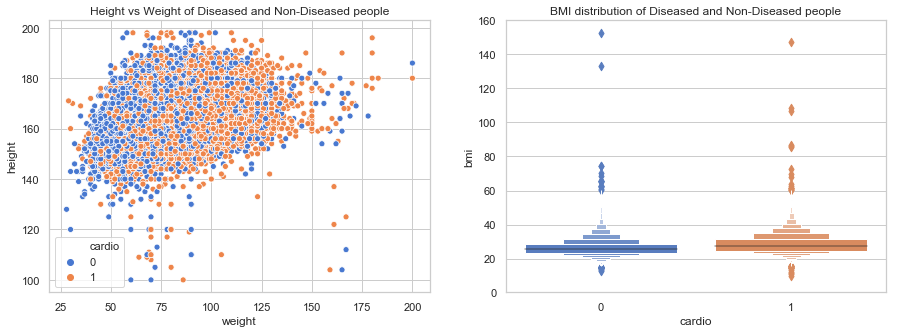

In [24]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
sns.set(style="whitegrid", palette = 'muted')

sns.scatterplot(df['weight'], df['height'], hue = df['cardio'], ax=ax1).set_title('Height vs Weight of Diseased and Non-Diseased people')
sns.boxenplot(x=df['cardio'], y=df['bmi'], orient = 'v', ax=ax2).set_title('BMI distribution of Diseased and Non-Diseased people');


#### I will move rows with bmi that are above 80 as those seem to be improbable values.

In [25]:
df.drop(df[df.bmi>80].index, axis=0, inplace=True)

#### Although there are still some outliers but the data is now pretty clean.

### Create age range

#### Before diving into data analysis, I would like to create a new categorical column named age_range.

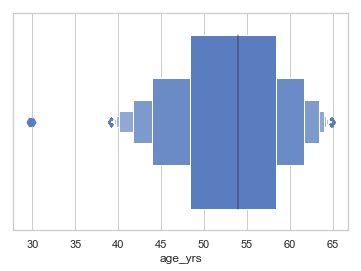

In [26]:
sns.boxenplot(x=df["age_yrs"]);

#### Based on above boxplot, I will create 3 age range:
#### - Young people: from 29 to 44 years old.
#### - Middle-aged people: from 45 to 54 years old.
#### - Elder people: from 55 upto 65 years old.

In [27]:
def age_range(age_yrs):
    if (age_yrs>29) and (age_yrs<45):
        return '29-44 years old'
    elif (age_yrs>=45) and (age_yrs<55):
        return '45-54 years old'
    else:
        return '55-65 years old'

In [28]:
# create new column named age_range
age_range_series = df.age_yrs.apply(age_range)
df.insert(3, "age_range", age_range_series, True)

In [29]:
# check that age_range column is well inserted in the dataset
df.head()

,id,age,age_yrs,age_range,gender,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,50.391781,45-54 years old,2,168,62.0,21.967120,110,80,1,1,0,0,1,0
1,1,20228,55.419178,55-65 years old,1,156,85.0,34.927679,140,90,3,1,0,0,1,1
2,2,18857,51.663014,45-54 years old,1,165,64.0,23.507805,130,70,3,1,0,0,0,1
3,3,17623,48.282192,45-54 years old,2,169,82.0,28.710479,150,100,1,1,0,0,1,1
4,4,17474,47.873973,45-54 years old,1,156,56.0,23.011177,100,60,1,1,0,0,0,0


## Data Exploration

#### In this part, I will check data distribution of some features in the dataset. Let's first start with gender.

In [30]:
gender1 = df[df.gender == 1]
gender2 = df[df.gender == 2]

### Check gender distribution

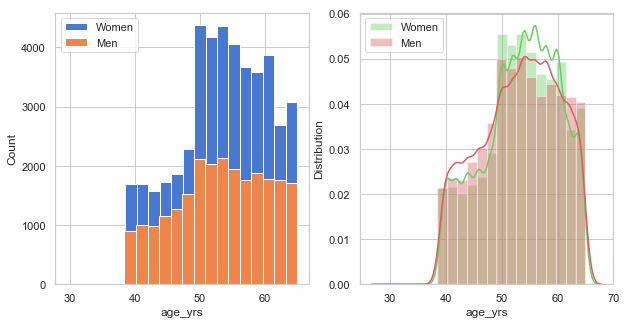

In [31]:
# plot gender distribution
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=False)
ax1.hist(df[df.gender==1]['age_yrs'], bins = 20, label = 'Women')
ax1.hist(df[df.gender==2]['age_yrs'], bins = 20, label = 'Men')
ax1.set_ylabel('Count')
ax1.set_xlabel('age_yrs')
ax1.legend(loc='upper left'),

sns.distplot(df[df.gender==1]['age_yrs'], bins = 20, ax=ax2, color='g', label = 'Women')
sns.distplot(df[df.gender==2]['age_yrs'], bins = 20, ax=ax2, color = 'r', label = 'Men')
ax2.set_ylabel('Distribution')
ax2.legend(loc='upper left');

#### We can clearly see that there are more women in the dataset than men. Notice anyway that under 50 years old and above 60 years old, men distribution is higher than women at the same age. And the contrary for peole between 50 and 60 years old.
#### What is then the percentage of each gender in the dataset?

In [32]:
print('Percentage of Women in the dataset: {:.2f}%.'.format(gender1.shape[0]/ df.shape[0]*100))
print('Percentage of Men in the dataset: {:.2f}%.'.format(gender2.shape[0]/ df.shape[0]*100))

Percentage of Women in the dataset: 65.14%.
Percentage of Men in the dataset: 34.86%.


#### It is important to analyze different metrics by splitting into Women and Men.

#### How is gender distributed among Diseased and Non-Diseased people?

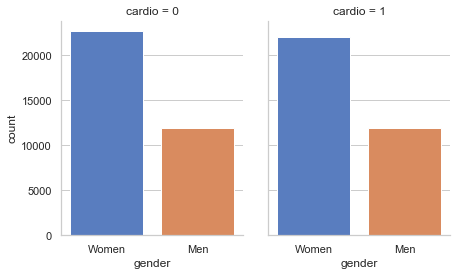

In [33]:
sns.catplot("gender", col="cardio",
                data=df,
                kind="count", height=4, aspect=.8).set_xticklabels(["Women", "Men"]);

#### We can see from above plot that each gender is quite equally distributed between disease and non-disease.
#### At the same time, there are as many diseased people as non-diseased people in the dataset.

In [34]:
print('Percentage of diseased people in the dataset: {:.2f}%.'.format(df[df.cardio == 1].shape[0] / df.shape[0]*100))
print('Percentage of non-diseased people in the dataset: {:.2f}%.'.format(df[df.cardio == 0].shape[0]/ df.shape[0]*100))

Percentage of diseased people in the dataset: 49.47%.
Percentage of non-diseased people in the dataset: 50.53%.


### Check age distribution

#### I'd like to see how is age distributed between diseased and non-diseased people, as well as between women and men.

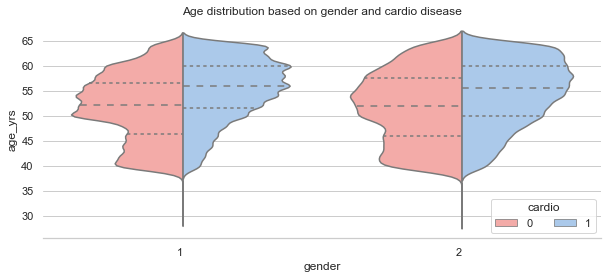

In [35]:
# PLOT
plt.figure(figsize=(10,4))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
violin = sns.violinplot(x="gender", y="age_yrs", hue="cardio",
               split=True, inner="quartile",
               palette={0: "r", 1: "b"}, 
               data=df, scale = 'count', legend_out = True)
sns.despine(left=True)
violin.legend(title = 'cardio', loc='lower right', ncol = 2)
violin.set_xticklabels(violin.get_xticklabels(), rotation=0, horizontalalignment='right')
violin.set_title('Age distribution based on gender and cardio disease');

#### We can see clearly that age median of diseased people is higher than non-diseased people about 3-4 years. This is true for both men and women.
#### Besides, notice that age is unimodally distributed among diseased people (with mode between 55 and 60 years old).
#### On the other hand, age is nearly bimodally distributed among non-diseased people. A peak is observed between 50 and 55 years old, and another between 40 and 45 years old.

## Data Analysis

#### In this part, I would like to answer the following questions:

#### 1. How are examination features (cholesterol, glucose, systolic blood pressure, diastolic blood pressure) related to cardiovascular disease?
#### 2. Are normal blood pressure people safe from cardiovascular risk?
#### 3. What is the right weight for height ratio that has the lowest risk of cardiovascular disease
#### 4. Does physical activity bring any help to overweighted people in preventing cardiovascular disease risk?

### How are examination features related to cardiovascular disease?

#### We all have assumptions that higher cholesterol and higher glucose lead to higher risk of cardiovascular disease. Is this true? Let's check it with the data.

#### I do know that people with higher systolic blood pressure have higher risk of cardiovascular disease. However, I don't have any idea about the relationship between diastolic blood pressure with disease. Let's try to find it out with this dataset.

#### From Data Exploration part, we can see that there are more Women in the dataset than Men. 
#### Besides, different age range is treated in different way in medecine. 
#### That's why I will proceed the analysis based on age range and gender, to see how cardiovascular disease varies from one group to another.

#### I will first create a function to examine how cardiovascular disease varies among gender, age range based on different examination features.

In [36]:
def check_features(dataframe, cat_feature, feature):
    '''
    Parameters:
    - dataframe: dataframe that I want to check how cardiovascular disease varies
    - cat_feature: categorical feature based on which I want to check how cardiovascular disease varies, as string. For example: age_range
    - feature: as string. Categorical feature only. For example: cholesterol, glucose.
    '''
    # create two dataframes: one for Women and one for Men, grouped by age_range and examination features
    women_df = dataframe[dataframe.gender == 1].groupby([cat_feature, feature])['cardio'].value_counts(normalize = True).rename('proportion').reset_index()
    men_df = dataframe[dataframe.gender == 2].groupby([cat_feature, feature])['cardio'].value_counts(normalize = True).rename('proportion').reset_index()
    
    # plot
    sns.set(style="whitegrid",palette="pastel")

    sns.catplot(x=feature, y="proportion",
                hue="cardio", col=cat_feature,
                data=women_df, height=3, aspect=0.8, 
                kind="bar", dodge=True).fig.suptitle('Women', y= 1.05);
    
    sns.catplot(x=feature, y="proportion",
                hue="cardio", col=cat_feature,
                data=men_df, height=3, aspect=0.8, 
                kind="bar", dodge=True).fig.suptitle('Men', y= 1.05);

#### Check first cholesterol

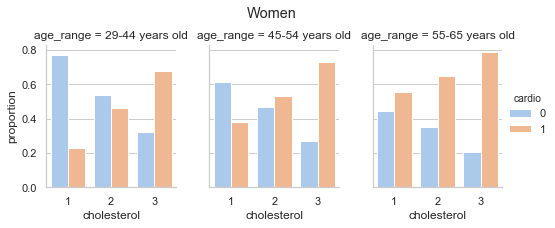

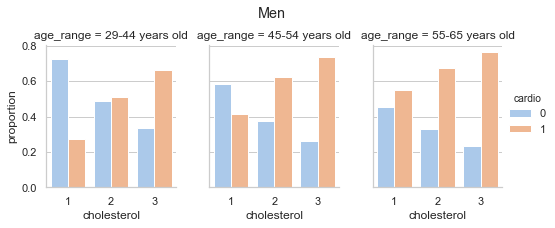

In [37]:
check_features(df, 'age_range', 'cholesterol')

#### We can see that:

#### - At each age range, higher cholesterol level is, higher the percentage of diseased people is (orange bar).
#### - At same cholesterol level, the percentage of diseased people increases if they are older.
#### - The percentage difference between non-diseased and diseased people is higher when they are older, at same cholesterol level.
#### - For young people (29-44 years old), cholesterol level 2, there are less diseased women while there are more diseased men.

#### Check glucose

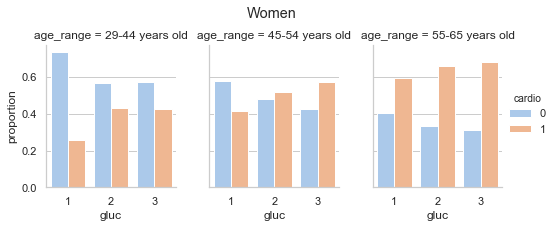

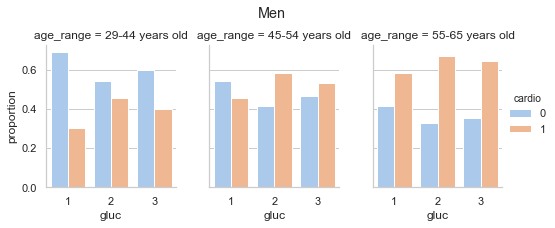

In [38]:
check_features(df, 'age_range', 'gluc')

#### The trend is slightly different than with cholesterol.
#### Higher glucose does not necessarily mean higher diseased people: diseased and non-diseased proportion are at nearly same rate for young women, whether glucose level is above normal or much above normal.
#### The inverse trend even happens with men, at every age range: higher glucose level doesn't seem to have a clear impact on cardiovascular disease.

#### Check systolic blood pressure & diastolic blood pressure

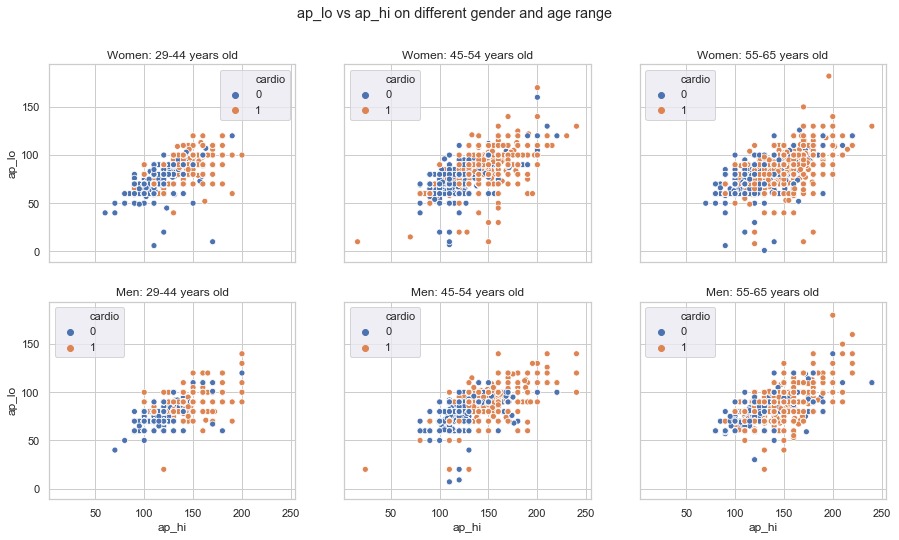

In [39]:
#cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)

f, axes = plt.subplots(2, 3, figsize=(15, 8), sharex=True, sharey=True)
f.suptitle('ap_lo vs ap_hi on different gender and age range')
sns.set(context='notebook', style='darkgrid', palette='deep',color_codes=True)
for ax in axes.flat:
    ax.set(xlabel='ap_hi', ylabel='ap_lo')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axes.flat:
    ax.label_outer()
    
sns.scatterplot(x="ap_hi", y="ap_lo", hue="cardio", data=gender1[gender1.age_range == '29-44 years old'], ax = axes[0, 0]).set_title('Women: 29-44 years old')
sns.scatterplot(x="ap_hi", y="ap_lo", hue="cardio", data=gender1[gender1.age_range == '45-54 years old'], ax = axes[0, 1]).set_title('Women: 45-54 years old')
sns.scatterplot(x="ap_hi", y="ap_lo", hue="cardio", data=gender1[gender1.age_range == '55-65 years old'], ax = axes[0, 2]).set_title('Women: 55-65 years old')

sns.scatterplot(x="ap_hi", y="ap_lo", hue="cardio", data=gender2[gender2.age_range == '29-44 years old'], ax = axes[1, 0]).set_title('Men: 29-44 years old')
sns.scatterplot(x="ap_hi", y="ap_lo", hue="cardio", data=gender2[gender2.age_range == '45-54 years old'], ax = axes[1, 1]).set_title('Men: 45-54 years old')
sns.scatterplot(x="ap_hi", y="ap_lo", hue="cardio", data=gender2[gender2.age_range == '55-65 years old'], ax = axes[1, 2]).set_title('Men: 55-65 years old');

#### A couple of remarks here:

#### - There are more patients with extremely high blood pressure among the eldest: seeing the dots above 200 mmHG systolic blood pressure and above 150 mmHG diastolic blood pressure among people more than 45 years old. This is same for both men and women.
#### - If we look at the subplots from left to right, diseased people (in red) tend to have systolic blood pressure shifts from right to left. This is interesting. This means that elder people don't need to have very high systolic blood pressure to have cardiovascular trouble.

### Are normal blood pressure people safe from cardiovascular risk?

#### I am particularly interested in people who have normal blood pressure, that is under 120 for systolic and under 60 for diastolic. Are these people prevented from cardiovascular disease risk?

In [40]:
# create a dataframe that contains normal systolic blood pressure and calculate the proportion of diseased and non-diseased people among gender and age_range
normal_ap_hi = df[df.ap_hi<=120].groupby(['gender', 'age_range'])['cardio'].value_counts(normalize=True).unstack(level=-1)
normal_ap_hi.columns = ['cardio = 0', 'cardio = 1']
normal_ap_hi

cardio = 0  cardio = 1
gender age_range                              
1      29-44 years old    0.849918    0.150082
       45-54 years old    0.732959    0.267041
       55-65 years old    0.547220    0.452780
2      29-44 years old    0.835406    0.164594
       45-54 years old    0.712343    0.287657
       55-65 years old    0.570040    0.429960

In [41]:
# similarly, create a dataframe that contains normal diastolic blood pressure and calculate the proportion of diseased and non-diseased people among gender and age_range
normal_ap_lo = df[df.ap_lo<=60].groupby(['gender', 'age_range'])['cardio'].value_counts(normalize=True).unstack(level=-1)
normal_ap_lo.columns = ['cardio = 0', 'cardio = 1']
normal_ap_lo

cardio = 0  cardio = 1
gender age_range                              
1      29-44 years old    0.898502    0.101498
       45-54 years old    0.795812    0.204188
       55-65 years old    0.578176    0.421824
2      29-44 years old    0.860294    0.139706
       45-54 years old    0.741722    0.258278
       55-65 years old    0.593750    0.406250

#### Let's plot these proportions to visualize better.

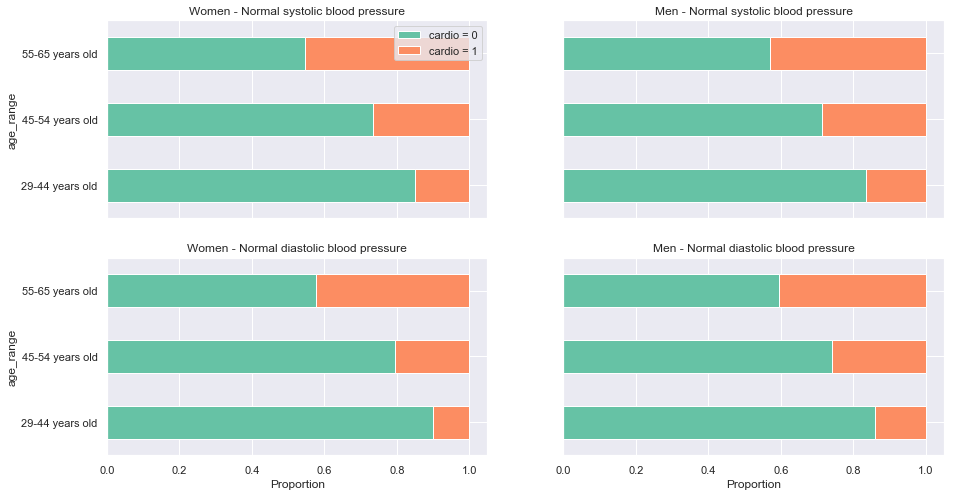

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharex=True, sharey=True)
sns.set(context='notebook', style='darkgrid', palette='Set2',color_codes=True)

for ax in axes.flat:
    ax.set(xlabel='Proportion')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axes.flat:
    ax.label_outer()
normal_ap_hi.loc[1, :].plot(kind='barh', stacked=True, ax=axes[0,0])
axes[0,0].set_title('Women - Normal systolic blood pressure')

normal_ap_hi.loc[2, :].plot(kind='barh', stacked=True, ax=axes[0,1])
axes[0,1].set_title('Men - Normal systolic blood pressure')
axes[0,1].get_legend().remove()

normal_ap_lo.loc[1, :].plot(kind='barh', stacked=True, ax=axes[1,0])
axes[1,0].set_title('Women - Normal diastolic blood pressure')
axes[1,0].get_legend().remove()

normal_ap_lo.loc[2, :].plot(kind='barh', stacked=True, ax=axes[1,1])
axes[1,1].set_title('Men - Normal diastolic blood pressure')
axes[1,1].get_legend().remove()

#### All these 4 subplots show that the proportion of diseased people increases with age, regardless of their normal blood pressure level.
#### Generally speaking, young people are quite well preserved from the risk of cardiovascular disease as only 10-20% have the trouble. However, the risk is double (over 40%) between 55 and 65 years old.

### What is the right weight for height ratio that has the lowest risk of cardiovascular disease?

#### BMI is a measurement of a person's leanness or corpulence based on their height and weight, and is intended to quantify tissue mass.
#### It is widely used as a general indicator of whether a person has a healthy body weight for their height.
#### Specifically, BMI is used to categorize whether a person is underweight, normal weight, overweight, or obese depending on what range the value falls between.
#### I am interested to know what the data says about best BMI level to avoid cardiovascular risk.
#### Does being normal always help? Is overweight always bad? Does underweight help to prevent cardiovascular trouble?

#### According to WHO, BMI is classified into 8 statistical categories. Reference: https://en.wikipedia.org/wiki/Body_mass_index. So let's create these 8 BMI categories in the dataset.

In [43]:
def bmi_range(bmi):
    if bmi <= 15:
        return 'Very severely underweight'
    elif 15 < bmi <= 16:
        return 'Severely underweight'
    elif 16 < bmi <= 18.5:
        return 'Underweight'
    elif 18.5 < bmi <= 25:
        return 'Healthy weight'
    elif 25 < bmi <= 30:
        return 'Overweight'
    elif 30 < bmi <= 35:
        return 'Moderately obese'
    elif 35 < bmi <= 40:
        return 'Severely obese'
    elif bmi > 40:
        return 'Very severely obese'

In [44]:
# create new column named age_range
bmi_range_series = df.bmi.apply(bmi_range)
df.insert(8, "bmi_range", bmi_range_series, True)

In [45]:
# check whether bmi_range is well inserted in the dataset
df.head()

,id,age,age_yrs,age_range,gender,height,weight,bmi,bmi_range,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,50.391781,45-54 years old,2,168,62.0,21.967120,Healthy weight,110,80,1,1,0,0,1,0
1,1,20228,55.419178,55-65 years old,1,156,85.0,34.927679,Moderately obese,140,90,3,1,0,0,1,1
2,2,18857,51.663014,45-54 years old,1,165,64.0,23.507805,Healthy weight,130,70,3,1,0,0,0,1
3,3,17623,48.282192,45-54 years old,2,169,82.0,28.710479,Overweight,150,100,1,1,0,0,1,1
4,4,17474,47.873973,45-54 years old,1,156,56.0,23.011177,Healthy weight,100,60,1,1,0,0,0,0


In [46]:
# group by gender, age_range and bmi_range, calculate the proportion of non-diseased and diseased people in each category
bmi_grouped = df.groupby(['gender', 'age_range', 'bmi_range'])['cardio'].value_counts(normalize=True).unstack(level=-1).fillna(0)
bmi_grouped.columns = ['cardio = 0', 'cardio = 1']

# calculate the proportion different of non-diseased people over diseased people
bmi_grouped['diff'] = bmi_grouped['cardio = 0'] - bmi_grouped['cardio = 1']

In [47]:
bmi_grouped

cardio = 0  cardio = 1  \
gender age_range       bmi_range                                           
1      29-44 years old Healthy weight               0.791637    0.208363   
                       Moderately obese             0.630887    0.369113   
                       Overweight                   0.700209    0.299791   
                       Severely obese               0.533133    0.466867   
                       Severely underweight         1.000000    0.000000   
                       Underweight                  0.929204    0.070796   
                       Very severely obese          0.509434    0.490566   
       45-54 years old Healthy weight               0.655827    0.344173   
                       Moderately obese             0.468819    0.531181   
                       Overweight                   0.567273    0.432727   
                       Severely obese               0.379453    0.620547   
                       Severely underweight         0.888889    0.111111   
                       Underweight                  0.758389    0.241611   
                       Very severely obese          0.331633    0.668367   
                       Very severely underweight    0.571429    0.428571   
       55-65 years old Healthy weight               0.467058    0.532942   
                       Moderately obese             0.328424    0.671576   
                       Overweight                   0.398662    0.601338   
                       Severely obese               0.277992    0.722008   
                       Severely underweight         0.250000    0.750000   
                       Underweight                  0.573643    0.426357   
                       Very severely obese          0.263764    0.736236   
                       Very severely underweight    0.555556    0.444444   
2      29-44 years old Healthy weight               0.775941    0.224059   
                       Moderately obese             0.498881    0.501119   
                       Overweight                   0.654886    0.345114   
                       Severely obese               0.364486    0.635514   
                       Severely underweight         0.000000    1.000000   
                       Underweight                  0.863636    0.136364   
                       Very severely obese          0.375000    0.625000   
                       Very severely underweight    0.500000    0.500000   
       45-54 years old Healthy weight               0.630402    0.369598   
                       Moderately obese             0.388616    0.611384   
                       Overweight                   0.502890    0.497110   
                       Severely obese               0.313043    0.686957   
                       Severely underweight         0.666667    0.333333   
                       Underweight                  0.787500    0.212500   
                       Very severely obese          0.284211    0.715789   
                       Very severely underweight    0.000000    1.000000   
       55-65 years old Healthy weight               0.480779    0.519221   
                       Moderately obese             0.316381    0.683619   
                       Overweight                   0.386695    0.613305   
                       Severely obese               0.231818    0.768182   
                       Severely underweight         1.000000    0.000000   
                       Underweight                  0.521739    0.478261   
                       Very severely obese          0.317308    0.682692   
                       Very severely underweight    0.500000    0.500000   

                                                      diff  
gender age_range       bmi_range                            
1      29-44 years old Healthy weight             0.583274  
                       Moderately obese           0.261774  
                       Overweight                 0.400417  
                    

#### Let's plot the above table to better visualize it:

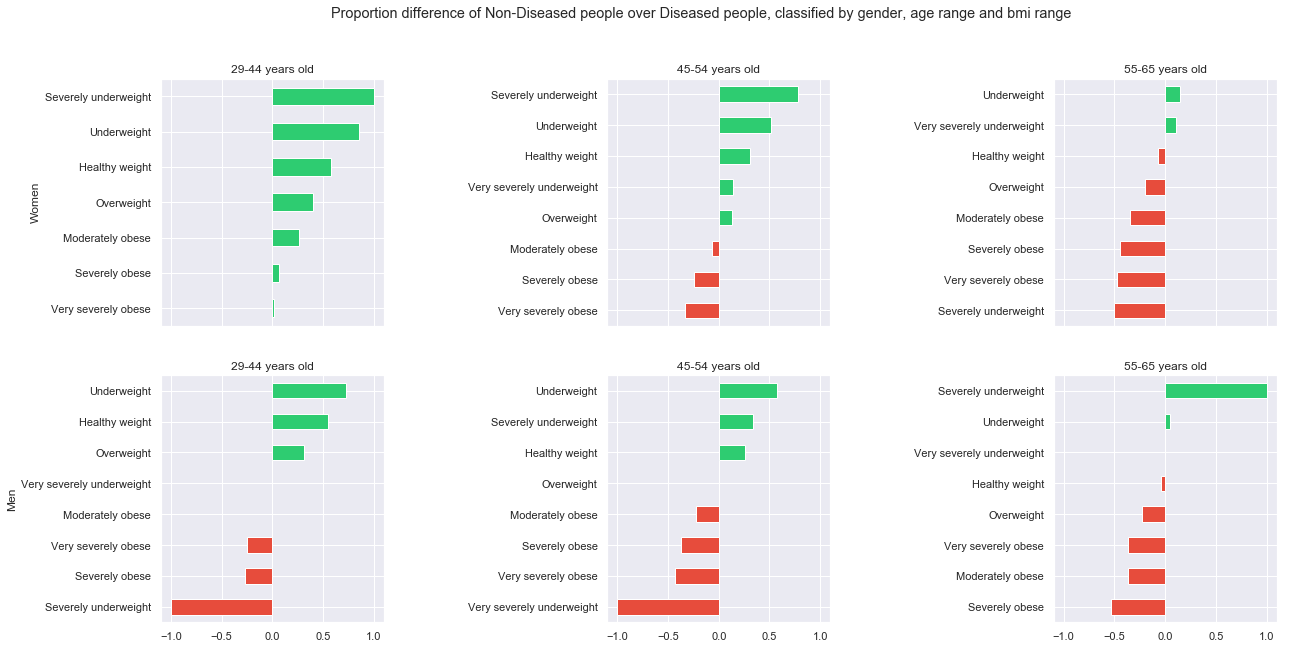

In [48]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10), sharex=True, sharey=False)
sns.set(context='notebook', style='darkgrid', palette='Set2',color_codes=True)
plt.subplots_adjust(wspace=1, hspace=None)
fig.suptitle('Proportion difference of Non-Diseased people over Diseased people, classified by gender, age range and bmi range')

gender = [1, 2]
age_range = ['29-44 years old', '45-54 years old', '55-65 years old']

for i in range(len(gender)): # i from 0 to 1
    for j in range(len(age_range)): # j from 0 to 2
        data = bmi_grouped.loc[gender[i], age_range[j], :]['diff'].sort_values(ascending=True)
        colors = ['#2ecc71' if x>0 else '#e74c3c' for x in data]
        data.plot(kind='barh', ax=axes[i,j], color = colors)
        labels = data.sort_values(ascending=True).index.get_level_values(2)
        axes[i,j].set_title(age_range[j])
        axes[i,j].set_yticklabels(labels)
        if j != 0:
            axes[i,j].yaxis.label.set_visible(False)

axes[0,0].yaxis.set_label_text('Women')
axes[1,0].yaxis.set_label_text('Men');

#### The above plots show the difference in proportion between non-diseased and diseased people, categorized per BMI range.
#### Notice that while healthy weight seems to help when you are young and middle-aged, its advantage is no longer valid when you get older, since there are more diseased than non-diseased people.
#### Underweight is always among top 2 best BMI categories, however, its positive impact becomes less important with age.
#### Is overweight always bad? Not quite. If you are young, you still have your chance to avoid cardiovascular risk.
#### However, If you are between 55 and 65 years old, you should take much care of your weight.

### Does physical activity bring any help to overweighted people in preventing cardiovascular disease risk?

#### We can see from above that overweighted people should worry more than normal or underweighted people. Do things change if they workout?
#### In this section, I would like to dive in to physical activities's impact on cardiovascular risk of overweighted and obese people.

#### Let's first create a dataframe containing overweighted and obese people.

In [49]:
overweight = df[df.bmi>25]
print('The percentage of overweighted and obese people in the dataset is: {:.2f}%'.format(overweight.shape[0]/ df.shape[0]*100))
print('Among them, {:.2f}% practice a physical activity.'.format(overweight[overweight.active == 1].shape[0]/ overweight.shape[0]*100))

The percentage of overweighted and obese people in the dataset is: 62.00%
Among them, 80.19% practice a physical activity.


#### Let's group them by bmi_range and whether they practice physical activity or not.

In [50]:
overweight_grouped = overweight.groupby(['bmi_range', 'active'])['cardio'].value_counts(normalize=True).unstack(level=-1)
overweight_grouped.columns = ['cardio = 0', 'cardio = 1']
overweight_grouped['diff'] = overweight_grouped['cardio = 0'] - overweight_grouped['cardio = 1']
overweight_grouped

cardio = 0  cardio = 1      diff
bmi_range           active                                  
Moderately obese    0         0.352497    0.647503 -0.295006
                    1         0.412971    0.587029 -0.174059
Overweight          0         0.466862    0.533138 -0.066275
                    1         0.501158    0.498842  0.002317
Severely obese      0         0.309685    0.690315 -0.380631
                    1         0.331645    0.668355 -0.336710
Very severely obese 0         0.264484    0.735516 -0.471033
                    1         0.329927    0.670073 -0.340146

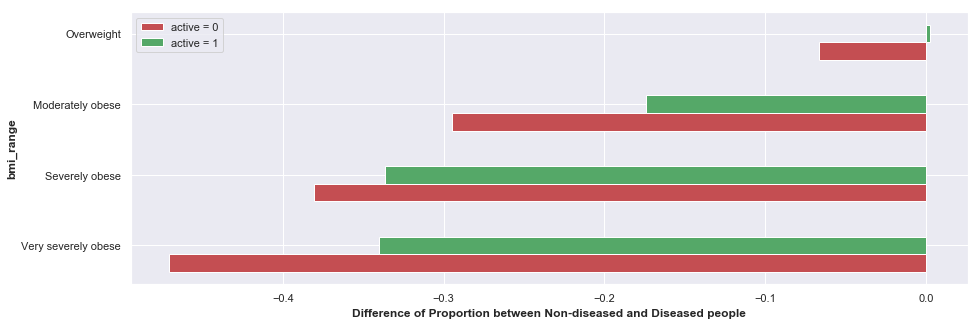

In [51]:
plt.figure(figsize=(15,5))
sns.set(context='notebook', style='darkgrid', color_codes=True)

# set width of bar
barHeight = 0.25

# Set position of bar on X axis
r1 = np.arange(4)
r2 = [x + barHeight for x in r1]

bar1 = overweight_grouped.query('active ==0')['diff'].sort_values()
bar2 = overweight_grouped.query('active ==1')['diff'].sort_values()

plt.barh(r1, bar1, height=barHeight, edgecolor='white', label='active = 0', color = 'r')
plt.barh(r2, bar2, height=barHeight, edgecolor='white', label='active = 1', color = 'g')

# Add yticks on the middle of the group bars
plt.ylabel('bmi_range', fontweight='bold')
plt.xlabel('Difference of Proportion between Non-diseased and Diseased people', fontweight='bold')
plt.yticks([r + barHeight for r in range(len(bar1))], ['Very severely obese', 'Severely obese', 'Moderately obese', 'Overweight'])

plt.legend();

#### Notice how your chance of being ill reduces significantly if you practice sport, seeing the huge difference between red bar (for being non-active) and green bar (for being active).
#### However, it's obvious that the risk of having cardiovascular trouble remains very important if you are obese, whether you are active or not.
#### But if you are just overweighted, you still get your chance to change your color from red to green by practicing.